###Problem-Statement:
In this project, we have to predict whether the password of users are strong/weak/average based on their password

Connecting Drive

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Necessary libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv('/content/drive/MyDrive/data/data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [43]:
data['strength'].unique()

array([1, 2, 0])

In [44]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [45]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [46]:
data.dropna(inplace=True)

In [47]:
data.isnull().sum()

password    0
strength    0
dtype: int64

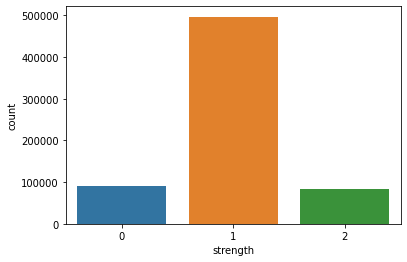

In [48]:
sns.countplot(data['strength'])

In [49]:
password_tuple = np.array(data)

In [50]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

####Shuffle data for making model robustness

In [51]:
import random
random.shuffle(password_tuple)

In [52]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [53]:
x

['kzde5577',
 'kzde5577',
 'kino3434',
 'megzy123',
 'kino3434',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'AVYq1lDE4MgAZfNt',
 'lamborghin1',
 'u6c8vhow',
 'kzde5577',
 'jytifok873',
 'u6c8vhow',
 'kino3434',
 'as326159',
 'v1118714',
 'megzy123',
 'WUt9IZzE0OQ7PkNE',
 'u6c8vhow',
 'sbl571017',
 'v1118714',
 'v1118714',
 'megzy123',
 'jytifok873',
 'visi7k1yr',
 'intel1',
 'intel1',
 'g067057895',
 '612035180tok',
 'as326159',
 'cigicigi123',
 'prisonbreak1',
 'trabajonet9',
 'kino3434',
 'lsdlsd1',
 'jerusalem393',
 'megzy123',
 'prisonbreak1',
 'memjan123',
 'AVYq1lDE4MgAZfNt',
 'kino3434',
 'alimagik1',
 'as326159',
 'kino3434',
 'exitos2009',
 'cigicigi123',
 'klara-tershina3H',
 'lsdlsd1',
 'WUt9IZzE0OQ7PkNE',
 'as326159',
 'fk9qi21m',
 'idofo673',
 '52558000aaa',
 'memjan123',
 'ejeko677',
 'TyWM72UNEex8Q8Y',
 'go7kew7a2po',
 'yitbos77',
 'fahad123',
 'lamborghin1',
 'b4NbTxDEyNgG141J',
 'asv5o9yu',
 'TyWM72UNEex8Q8Y',
 'yk530mg8',
 'sbl571017',
 'exitos2009',
 'calcifer32

###Apply TF-IDF on data

In [54]:
def word_divide_char(inputs):
  character = []
  for i in inputs:
    character.append(i)
  return character

In [55]:
word_divide_char('lqksuym982')

['l', 'q', 'k', 's', 'u', 'y', 'm', '9', '8', '2']

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [58]:
x = vectorizer.fit_transform(x)

In [59]:
x.shape

(669639, 130)

In [60]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x8d',
 '\xa0',
 '¡',
 '¢',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'ï',
 'ð',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 '—',
 '‚']

In [61]:
first_document_vector = x[0]
first_document_vector

<1x130 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [62]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56702199],
        [0.        ],
        [0.59095479],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [63]:
df = pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])

In [64]:
df

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ý,0.0
þ,0.0
ÿ,0.0
—,0.0


In [65]:
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.590955
5,0.567022
z,0.336018
k,0.292216
d,0.286299
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


###Apply Logistics Regression on Data

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [68]:
x_train.shape

(535711, 130)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression(random_state=0,multi_class = 'multinomial')

In [71]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

####Check for one random password

In [72]:
dt = np.array(['%!#123abcd'])
pred = vectorizer.transform(dt)
clf.predict(pred)

array([2])

That means above password is strong.

In [73]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

###Checking Accuracy of model

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 5391 12678    11]
 [ 3908 92758  2577]
 [   33  5125 11447]]


In [76]:
#print accuracy
print(accuracy_score(y_test,y_pred))

0.8183202914999104


###Printing Classification Report

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     18080
           1       0.84      0.93      0.88     99243
           2       0.82      0.69      0.75     16605

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

